# Polynomial Regression
多项式回归是线性回归模型的一种，其回归函数关于回归系数是线性的。其中自变量x和因变量y之间的关系被建模为n次多项式。

In [1]:
import numpy as np

X = np.arange(1, 11).reshape(5, 2)
# 先生成5行2列 10个元素的矩阵
X.shape

(5, 2)

In [2]:
X

array([[ 1,  2],
       [ 3,  4],
       [ 5,  6],
       [ 7,  8],
       [ 9, 10]])

In [5]:
from sklearn.preprocessing import PolynomialFeatures
# 升维是数据处理范畴，所以调用的库在preprocessing中

poly=PolynomialFeatures()   #degree 参数是设置维度，默认2
poly.fit(X)

# 将X转换成最多包含X二次幂的数据集
X2=poly.transform(X)
X2

array([[  1.,   1.,   2.,   1.,   2.,   4.],
       [  1.,   3.,   4.,   9.,  12.,  16.],
       [  1.,   5.,   6.,  25.,  30.,  36.],
       [  1.,   7.,   8.,  49.,  56.,  64.],
       [  1.,   9.,  10.,  81.,  90., 100.]])

第一列很显然是0次项系数；第二列和第三列就是原本的X矩阵；第四列是第二列（原X的第一列）平方的结果；第五列是第二、三两列相乘的结果；第六列是第三列（原X的第二列）平方的结果。

In [6]:
# 看下3维

poly=PolynomialFeatures(degree=3)   #degree 参数是设置维度，默认2
poly.fit(X)

# 将X转换成最多包含X二次幂的数据集
X3=poly.transform(X)
X3

array([[   1.,    1.,    2.,    1.,    2.,    4.,    1.,    2.,    4.,
           8.],
       [   1.,    3.,    4.,    9.,   12.,   16.,   27.,   36.,   48.,
          64.],
       [   1.,    5.,    6.,   25.,   30.,   36.,  125.,  150.,  180.,
         216.],
       [   1.,    7.,    8.,   49.,   56.,   64.,  343.,  392.,  448.,
         512.],
       [   1.,    9.,   10.,   81.,   90.,  100.,  729.,  810.,  900.,
        1000.]])

In [7]:
# 看下4维

poly=PolynomialFeatures(degree=4)   #degree 参数是设置维度，默认2
poly.fit(X)

# 将X转换成最多包含X二次幂的数据集
X4=poly.transform(X)
X4

array([[1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 4.000e+00,
        1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 4.000e+00, 9.000e+00, 1.200e+01, 1.600e+01,
        2.700e+01, 3.600e+01, 4.800e+01, 6.400e+01, 8.100e+01, 1.080e+02,
        1.440e+02, 1.920e+02, 2.560e+02],
       [1.000e+00, 5.000e+00, 6.000e+00, 2.500e+01, 3.000e+01, 3.600e+01,
        1.250e+02, 1.500e+02, 1.800e+02, 2.160e+02, 6.250e+02, 7.500e+02,
        9.000e+02, 1.080e+03, 1.296e+03],
       [1.000e+00, 7.000e+00, 8.000e+00, 4.900e+01, 5.600e+01, 6.400e+01,
        3.430e+02, 3.920e+02, 4.480e+02, 5.120e+02, 2.401e+03, 2.744e+03,
        3.136e+03, 3.584e+03, 4.096e+03],
       [1.000e+00, 9.000e+00, 1.000e+01, 8.100e+01, 9.000e+01, 1.000e+02,
        7.290e+02, 8.100e+02, 9.000e+02, 1.000e+03, 6.561e+03, 7.290e+03,
        8.100e+03, 9.000e+03, 1.000e+04]])

升维不是一种最优的方法，也是有局限性，维度太高，数据复杂度增大，会导致模型过拟合。适当的升维是可以的。

# Pipeline

在使用sklearn建模时，我们可以考虑把简单的数据处理、特征处理、建模做成流水线的形式。此时用到Pipeline功能

首先我们回顾多项式回归的过程：

    将原始数据通过PolynomialFeatures生成相应的多项式特征
    多项式数据可能还要进行特征归一化处理
    将数据送给线性回归

Pipeline就是将这些步骤都放在一起。参数传入一个列表，列表中的每个元素是管道中的一个步骤。每个元素是一个元组，元组的第一个元素是名字（字符串），第二个元素是实例化。

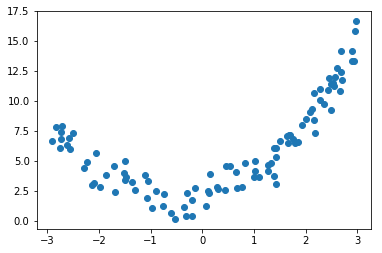

In [12]:
import numpy as np
import matplotlib.pyplot as plt

x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)
y = 0.5 + x**2 + x + 2 + np.random.normal(0, 1, size=100)
plt.scatter(x, y)
plt.show()

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

poly_reg =Pipeline([('poly',PolynomialFeatures(degree=2)),
                   ('scalar',StandardScaler()),
                   ('lr_reg',LinearRegression())]
)

In [13]:
poly_reg.fit(X,y)
y_predict = poly_reg.predict(X)

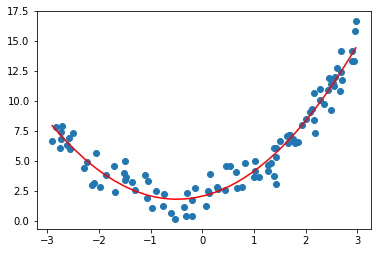

In [14]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color='r')
plt.show()